uploading the dataset file in colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


checking the uploaded dataset.csv

In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()


V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  scaled_Amount  scaled_Time  
0 -0.189115  0.133558 -0.021053      0       0.244964    -1.996583  
1  0.125895 -0.008983  0.014724      0      -0.342475    -1.996583  
2 -0.139097 -0.055353 -0.059752      0       1.160686    -1.996562  
3 -0.221929  0.062723  0.061458      0       0.140534    -1.996562  
4  0.502292  0.219422  0.215153      0      -0.073403    -1.996541  

[5 rows x 31 columns]

In [ ]:

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('dataset.csv')

# Define features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Split the data (though Isolation Forest is unsupervised, we use this for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
model.fit(X_train)

# Predict: Isolation Forest returns -1 for anomalies, 1 for normal
y_pred = model.predict(X_test)
y_pred = [1 if p == -1 else 0 for p in y_pred]  # Convert to match 'Class' labels

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[85253    54]
 [  105    31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.36      0.23      0.28       136

    accuracy                           1.00     85443
   macro avg       0.68      0.61      0.64     85443
weighted avg       1.00      1.00      1.00     85443



Exploratory Data Analysis EDA

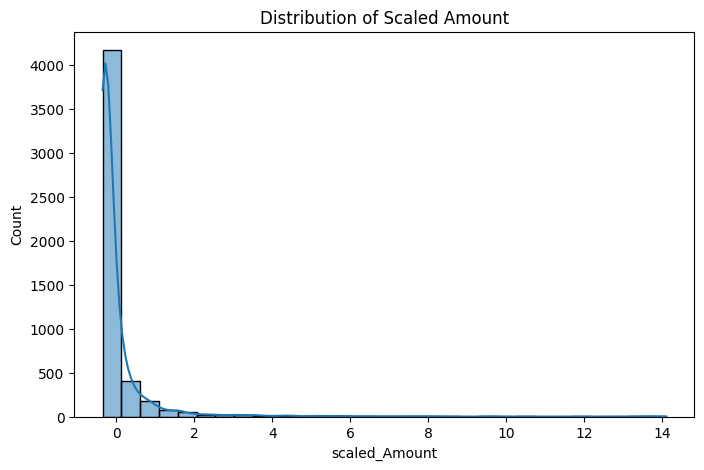

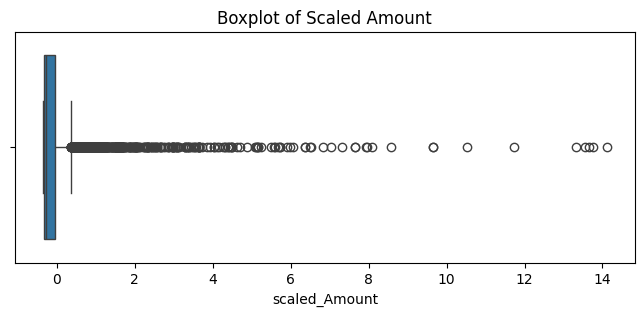

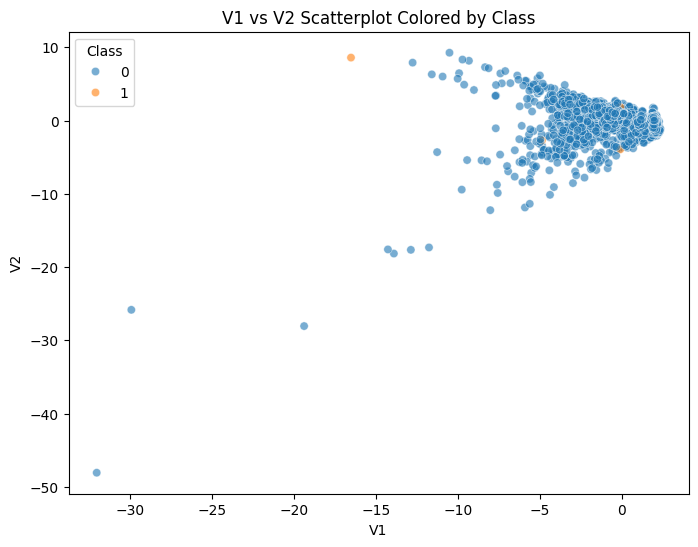

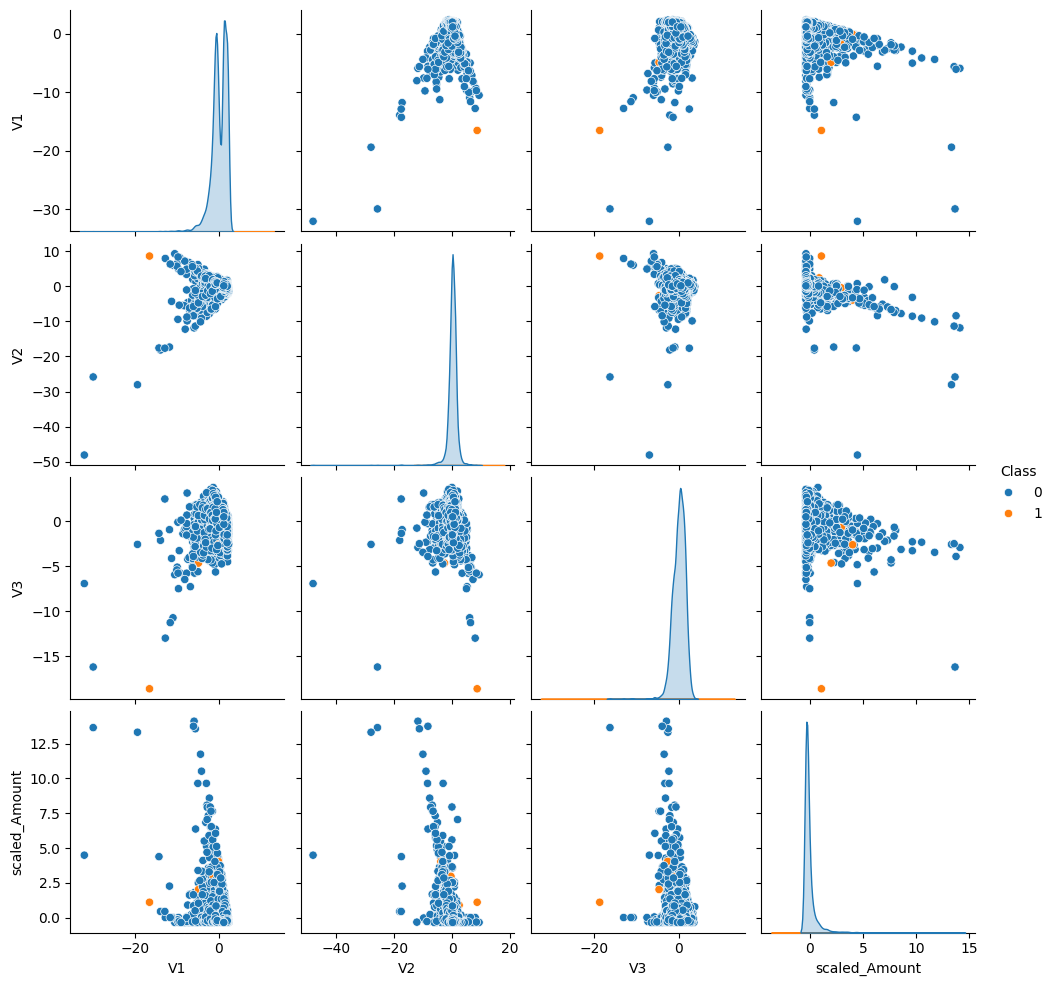

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load dataset
df = pd.read_csv("dataset.csv")  # Assumes the dataset is in the same folder

# Optional: sample if the dataset is large
eda_df = df.sample(n=5000, random_state=42)

# Univariate Analysis: Histogram of scaled_Amount
plt.figure(figsize=(8, 5))
sns.histplot(eda_df['scaled_Amount'], bins=30, kde=True)
plt.title('Distribution of Scaled Amount')
plt.xlabel('scaled_Amount')
plt.ylabel('Count')
plt.show()

# Boxplot of scaled_Amount
plt.figure(figsize=(8, 3))
sns.boxplot(x=eda_df['scaled_Amount'])
plt.title("Boxplot of Scaled Amount")
plt.show()

# Countplot for Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=eda_df['Class'])
plt.title("Class Distribution (0: Legit, 1: Fraud)")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = eda_df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatterplot: V1 vs V2 by Class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=eda_df, alpha=0.6)
plt.title("V1 vs V2 Scatterplot Colored by Class")
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

# Pairplot for selected numeric features
selected_features = ['V1', 'V2', 'V3', 'scaled_Amount', 'Class']
eda_pairplot_df = eda_df[selected_features].dropna()
eda_pairplot_df = eda_pairplot_df.select_dtypes(include='number')
eda_pairplot_df['Class'] = eda_df['Class'].astype(int)

sns.pairplot(eda_pairplot_df, hue='Class', diag_kind='kde')
plt.show()


feature engineering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

df = pd.read_csv("dataset.csv")  # Assumes the dataset is in the same folder

# Assume df already has 'scaled_Amount' and no 'Amount' column
# Create Ratios: Example - V1 to V2 ratio (avoid division by zero)
df['V1_V2_ratio'] = df['V1'] / (df['V2'] + 1e-6)

# Binning: Binning scaled_Amount into 4 quantile bins
df['Amount_bin'] = pd.qcut(df['scaled_Amount'], q=4, labels=False)

# Polynomial Features: Generate interaction terms among selected features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[['V1', 'V2', 'V3']])
poly_feature_names = poly.get_feature_names_out(['V1', 'V2', 'V3'])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate polynomial features
df = pd.concat([df.reset_index(drop=True), df_poly], axis=1)

# Optional: PCA to reduce dimensionality
features_for_pca = df.drop(columns=['Class'], errors='ignore').select_dtypes(include='number')
pca = PCA(n_components=5)
pca_features = pca.fit_transform(features_for_pca)
pca_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(5)])

# Final dataset with PCA features
df = pd.concat([df.reset_index(drop=True), pca_df], axis=1)


model building

In [ ]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------------
# 1. Isolation Forest (Anomaly Detection)
# -------------------------------
iso_forest = IsolationForest(contamination=0.001, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_test)

# Convert IsolationForest output: 1 → normal, -1 → anomaly → 1 (fraud), 0 (non-fraud)
y_pred_iso = [1 if val == -1 else 0 for val in y_pred_iso]

print("Isolation Forest Results:")
print(confusion_matrix(y_test, y_pred_iso))
print(classification_report(y_test, y_pred_iso, zero_division=0))

# -------------------------------
# 2. Random Forest (Supervised Model)
# -------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))

# -------------------------------
# 3. Logistic Regression (Baseline)
# -------------------------------
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, zero_division=0))


Isolation Forest Results:
[[56822    42]
 [   83    15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.15      0.19        98

    accuracy                           1.00     56962
   macro avg       0.63      0.58      0.60     56962
weighted avg       1.00      1.00      1.00     56962


Random Forest Results:
[[56859     5]
 [   20    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Logistic Regression Results:
[[56848    16]
 [   33    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.66      0.73        98

    accur

**visualization of results and model insights**

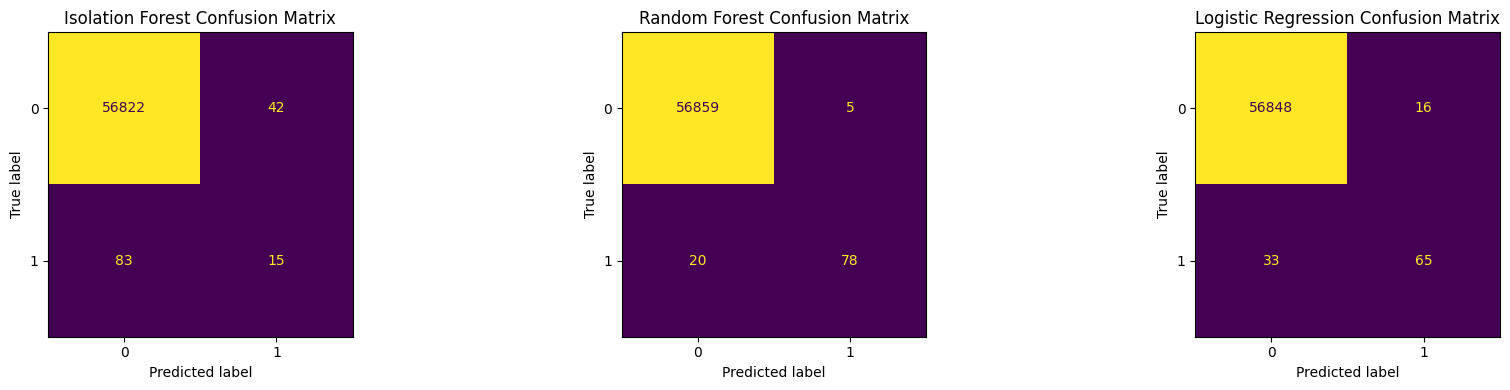

<ipython-input-23-f7d98f61198b>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

# -------------------------------
# Confusion Matrices
# -------------------------------
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

models = {'Isolation Forest': y_pred_iso, 'Random Forest': y_pred_rf, 'Logistic Regression': y_pred_lr}
for ax, (title, preds) in zip(axs, models.items()):
    ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=ax, colorbar=False)
    ax.set_title(f'{title} Confusion Matrix')

plt.tight_layout()
plt.show()

# -------------------------------
# ROC Curves
# -------------------------------
plt.figure(figsize=(10, 6))

# Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')

# Logistic Regression
lr_probs = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
auc_lr = roc_auc_score(y_test, lr_probs)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Feature Importance (Random Forest)
# -------------------------------
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
